# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
from ddpg_agent_complexl import Agent
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

cuda:0


In [3]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64_3/Reacher.exe', no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('state shape looks like:', env_info.vector_observations.shape)

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
state shape looks like: (20, 33)


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
agent = Agent(state_size=state_size,action_size=action_size,random_seed=1, num_agents=num_agents)
print(agent)
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
# score = 0
# step = 0

initalized seeds
actor set
critic set
noise set
replay memory set


c:\Users\ShiftAorus\.conda\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:114: UserWarning: 
    Found GPU0 NVIDIA GeForce RTX 3090 which requires CUDA_VERSION >= 9000 for
     optimal performance and fast startup time, but your PyTorch was compiled
     with CUDA_VERSION 8000. Please install the correct PyTorch binary
     using instructions from http://pytorch.org
    
  warnings.warn(incorrect_binary_warn % (d, name, 9000, CUDA_VERSION))


In [7]:
def figures(scores):
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title('Progressive plot')
    plt.show()

Episode 1	Last 100 Avg Score: 0.4494999899528921	 Episode Avg Score: 0.4494999899528921	Scores: [0.33999999 0.41999999 0.51999999 0.39999999 0.47999999 0.28999999
 0.64999999 1.12999997 0.52999999 0.45999999 0.45999999 0.
 0.53999999 0.23999999 0.58999999 0.22       0.68999998 0.62999999
Episode 2	Last 100 Avg Score: 0.3877499913331121	 Episode Avg Score: 0.3259999927133322	Scores: [0.1        0.04       0.21       0.69999998 0.34999999 0.21
 0.17       0.51999999 0.32999999 0.14       0.         1.37999997
 0.38999999 0.12       0.22999999 0.57999999 0.12       0.22999999
Episode 3	Last 100 Avg Score: 0.5448333211553593	 Episode Avg Score: 0.8589999807998538	Scores: [1.39999997 0.58999999 1.96999996 0.97999998 0.80999998 1.19999997
 0.25999999 0.47999999 0.96999998 0.73999998 0.53999999 0.79999998
 0.60999999 0.82999998 0.79999998 0.         1.35999997 0.65999999
Episode 4	Last 100 Avg Score: 0.6749999849125743	 Episode Avg Score: 1.0654999761842192	Scores: [1.22999997 0.86999998 1.64

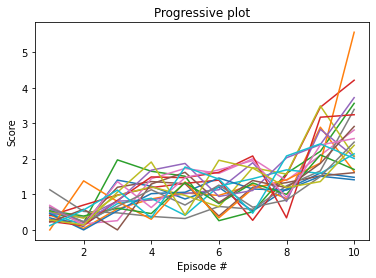

Episode 11	Last 100 Avg Score: 1.3637726967900314	 Episode Avg Score: 2.707499939482659	Scores: [2.31999995 2.10999995 3.74999992 4.5599999  3.51999992 2.39999995
 3.09999993 2.23999995 2.02999995 1.75999996 2.83999994 2.36999995
 1.56999996 3.00999993 3.70999992 1.54999997 2.10999995 4.18999991
Episode 12	Last 100 Avg Score: 1.4965416332163537	 Episode Avg Score: 2.9569999339058994	Scores: [5.77999987 2.14999995 1.75999996 2.46999994 4.5599999  4.03999991
 4.22999991 2.67999994 2.95999993 1.63999996 2.39999995 3.21999993
 1.98999996 2.00999996 2.52999994 4.4099999  2.16999995 1.58999996
Episode 13	Last 100 Avg Score: 1.6684615011685169	 Episode Avg Score: 3.7314999165944753	Scores: [4.93999989 3.55999992 0.43999999 5.04999989 2.17999995 4.3999999
 2.00999996 3.11999993 4.5799999  4.03999991 6.22999986 4.6499999
 4.3999999  3.99999991 3.54999992 2.79999994 4.04999991 3.28999993
Episode 14	Last 100 Avg Score: 1.9280356711907578	 Episode Avg Score: 5.302499881479889	Scores: [ 2.90999993 

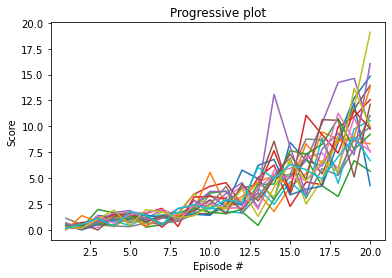

Episode 21	Last 100 Avg Score: 4.126976098231085	 Episode Avg Score: 12.581499718781561	Scores: [13.90999969 13.2799997   6.52999985  9.86999978 10.72999976 13.6199997
 11.32999975 13.12999971 16.14999964 10.50999977  9.63999978 12.01999973
  9.70999978  9.60999979 13.94999969 20.42999954  9.94999978 16.67999963
Episode 22	Last 100 Avg Score: 4.511977171876722	 Episode Avg Score: 12.596999718435109	Scores: [ 6.78999985 15.07999966 12.47999972  9.1299998  11.83999974  9.85999978
 10.69999976 21.49999952 17.9499996  11.44999974 11.83999974 11.28999975
 11.87999973  9.84999978 13.2599997  16.91999962 13.3199997  17.9999996
Episode 23	Last 100 Avg Score: 4.983717279909584	 Episode Avg Score: 15.361999656632543	Scores: [19.72999956 11.25999975 24.03999946 14.78999967 16.93999962 14.97999967
 20.47999954 12.66999972 14.03999969  9.71999978 11.50999974 19.56999956
 16.57999963 14.25999968 14.75999967 12.31999972 17.8499996   8.54999981
Episode 24	Last 100 Avg Score: 5.4339582118748995	 Episod

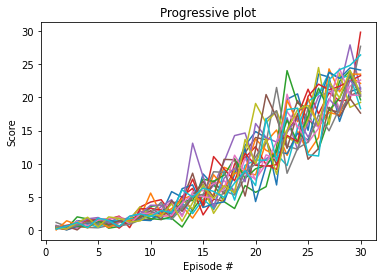

Episode 31	Last 100 Avg Score: 8.807467545073239	 Episode Avg Score: 23.946999464742838	Scores: [22.85999949 32.25999928 23.45999948 25.58999943 23.97999946 22.98999949
 16.82999962 24.10999946 20.83999953 22.08999951 20.68999954 22.74999949
 27.57999938 25.75999942 22.08999951 25.35999943 31.4699993  26.19999941
Episode 32	Last 100 Avg Score: 9.318015416726121	 Episode Avg Score: 25.144999437965453	Scores: [31.99999928 23.88999947 23.91999947 23.86999947 27.63999938 27.67999938
 24.27999946 21.47999952 24.67999945 26.24999941 25.35999943 20.73999954
 15.72999965 24.73999945 31.82999929 29.86999933 20.56999954 26.57999941
Episode 33	Last 100 Avg Score: 9.883999779075385	 Episode Avg Score: 27.995499374251814	Scores: [28.58999936 32.10999928 25.65999943 30.13999933 32.54999927 19.04999957
 30.28999932 25.54999943 29.04999935 27.33999939 27.20999939 28.23999937
 30.36999932 27.83999938 27.52999938 28.68999936 30.43999932 29.56999934
Episode 34	Last 100 Avg Score: 10.41798506125753	 Episo

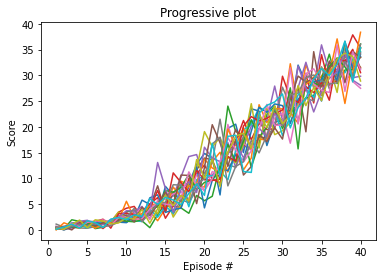

Episode 41	Last 100 Avg Score: 14.0529265151609	 Episode Avg Score: 34.062499238643795	Scores: [31.57999929 30.79999931 37.28999917 29.39999934 31.56999929 33.99999924
 35.6399992  35.7199992  34.14999924 34.28999923 31.2199993  33.98999924
 34.12999924 37.24999917 32.73999927 36.31999919 33.43999925 38.51999914
Episode 42	Last 100 Avg Score: 14.53421396084928	 Episode Avg Score: 34.26699923407286	Scores: [28.21999937 37.21999917 33.43999925 27.82999938 37.57999916 35.54999921
 35.46999921 32.77999927 35.55999921 30.54999932 38.03999915 35.47999921
 34.45999923 35.03999922 31.99999928 35.47999921 39.25999912 31.99999928
Episode 43	Last 100 Avg Score: 15.0141043155714	 Episode Avg Score: 35.169499213900416	Scores: [37.36999916 32.95999926 31.3899993  36.18999919 36.90999917 36.58999918
 37.16999917 35.6499992  35.7099992  33.91999924 32.05999928 36.97999917
 35.19999921 33.89999924 34.94999922 36.94999917 31.60999929 34.12999924
Episode 44	Last 100 Avg Score: 15.44684056382711	 Episode 

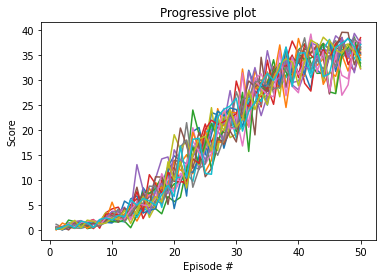

Episode 51	Last 100 Avg Score: 18.16497998613791	 Episode Avg Score: 35.29099921118468	Scores: [31.68999929 37.21999917 35.8599992  32.18999928 32.93999926 37.95999915
 37.21999917 38.35999914 39.29999912 35.22999921 34.34999923 35.25999921
 36.09999919 32.90999926 32.39999928 34.65999923 34.57999923 36.62999918
Episode 52	Last 100 Avg Score: 18.51543227845552	 Episode Avg Score: 36.38849918665365	Scores: [37.60999916 36.68999918 37.27999917 35.09999922 37.73999916 37.18999917
 36.86999918 36.78999918 38.54999914 36.72999918 36.39999919 37.62999916
 35.7399992  34.52999923 37.57999916 30.22999932 37.00999917 36.0099992
Episode 53	Last 100 Avg Score: 18.858093918111386	 Episode Avg Score: 36.67649918021634	Scores: [37.75999916 36.93999917 32.12999928 38.48999914 37.89999915 37.02999917
 36.20999919 38.66999914 38.50999914 33.77999924 38.20999915 37.42999916
 36.57999918 38.16999915 37.85999915 35.41999921 35.05999922 32.47999927
Episode 54	Last 100 Avg Score: 19.19399957098067	 Episode 

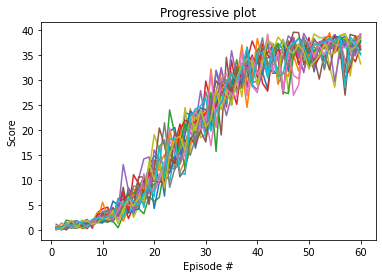

Episode 61	Last 100 Avg Score: 21.202622476904118	 Episode Avg Score: 37.16199916936457	Scores: [35.9399992  39.21999912 38.25999914 36.71999918 36.73999918 38.01999915
 36.48999918 35.54999921 38.25999914 37.36999916 38.38999914 37.50999916
 36.01999919 38.36999914 34.76999922 38.36999914 38.13999915 35.38999921
Episode 62	Last 100 Avg Score: 21.469918874948615	 Episode Avg Score: 37.774999155662954	Scores: [37.02999917 38.14999915 35.25999921 35.9199992  36.80999918 37.91999915
 38.81999913 39.00999913 38.31999914 37.65999916 37.50999916 38.24999915
 38.93999913 38.96999913 38.01999915 39.15999912 37.75999916 36.78999918
Episode 63	Last 100 Avg Score: 21.73145189521657	 Episode Avg Score: 37.94649915182963	Scores: [37.98999915 38.69999913 39.25999912 38.73999913 36.66999918 37.98999915
 38.24999915 39.64999911 37.72999916 35.49999921 38.02999915 36.04999919
 36.23999919 38.18999915 37.25999917 37.78999916 39.10999913 37.54999916
Episode 64	Last 100 Avg Score: 21.979952633709765	 Epis

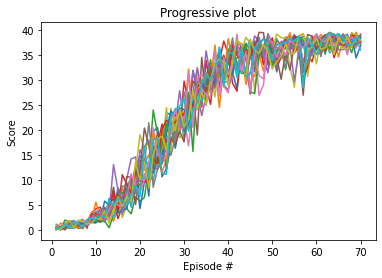

Episode 71	Last 100 Avg Score: 23.5462882060938	 Episode Avg Score: 37.89849915290252	Scores: [37.24999917 37.20999917 37.63999916 36.69999918 37.97999915 37.40999916
 38.88999913 36.04999919 37.89999915 37.81999915 39.01999913 38.93999913
 38.77999913 38.45999914 37.70999916 38.08999915 38.34999914 37.14999917
Episode 72	Last 100 Avg Score: 23.744256413718944	 Episode Avg Score: 37.79999915510416	Scores: [36.94999917 38.88999913 38.90999913 35.21999921 38.52999914 39.49999912
 38.57999914 36.03999919 36.43999919 38.06999915 39.00999913 33.94999924
 38.31999914 37.32999917 39.48999912 39.13999913 37.64999916 39.14999912
Episode 73	Last 100 Avg Score: 23.943937820975655	 Episode Avg Score: 38.320999143458906	Scores: [39.02999913 38.21999915 38.17999915 39.22999912 38.90999913 38.35999914
 38.44999914 38.55999914 37.61999916 39.23999912 38.80999913 37.31999917
 37.45999916 38.26999914 38.81999913 38.92999913 37.64999916 36.32999919
Episode 74	Last 100 Avg Score: 24.13694540644316	 Episod

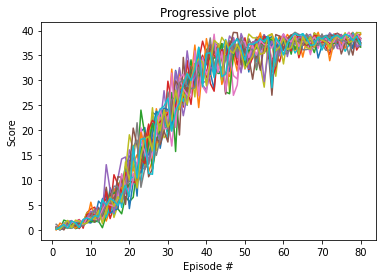

Episode 81	Last 100 Avg Score: 25.338166100314506	 Episode Avg Score: 38.02299915011972	Scores: [39.43999912 39.23999912 39.02999913 35.7599992  36.53999918 39.51999912
 38.83999913 39.08999913 38.10999915 39.17999912 36.68999918 37.78999916
 36.31999919 36.50999918 37.71999916 39.23999912 38.06999915 38.70999913
Episode 82	Last 100 Avg Score: 25.49726772277457	 Episode Avg Score: 38.384499142039566	Scores: [39.31999912 35.6099992  36.0099992  39.15999912 39.53999912 38.96999913
 38.15999915 39.16999912 38.89999913 37.88999915 38.34999914 37.32999917
 39.08999913 38.99999913 39.38999912 38.71999913 39.15999912 35.6599992
Episode 83	Last 100 Avg Score: 25.651294607371764	 Episode Avg Score: 38.281499144341794	Scores: [35.9499992  39.47999912 38.00999915 38.80999913 37.60999916 37.94999915
 38.38999914 38.61999914 37.63999916 39.39999912 38.20999915 39.26999912
 37.71999916 39.29999912 36.66999918 37.53999916 39.52999912 38.23999915
Episode 84	Last 100 Avg Score: 25.798904185254305	 Epis

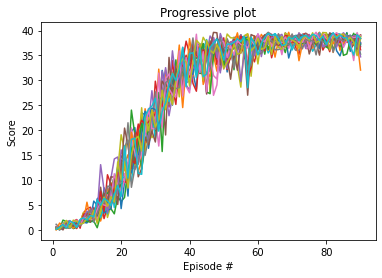

Episode 91	Last 100 Avg Score: 26.72915874321607	 Episode Avg Score: 37.737499156501144	Scores: [36.13999919 38.22999915 37.27999917 38.26999914 38.60999914 38.50999914
 38.12999915 38.61999914 38.43999914 36.84999918 36.70999918 38.63999914
 38.25999914 38.00999915 37.03999917 37.48999916 38.35999914 36.53999918
Episode 92	Last 100 Avg Score: 26.85049939984456	 Episode Avg Score: 37.892499153036624	Scores: [39.08999913 38.70999913 35.9699992  38.57999914 36.70999918 38.49999914
 35.27999921 37.35999916 38.58999914 34.58999923 38.42999914 38.85999913
 35.8899992  39.15999912 38.78999913 37.97999915 38.87999913 38.58999914
Episode 93	Last 100 Avg Score: 26.96533810695513	 Episode Avg Score: 37.530499161127956	Scores: [38.21999915 36.97999917 33.20999926 39.01999913 34.76999922 37.98999915
 37.14999917 34.72999922 36.92999917 38.60999914 38.77999913 36.95999917
 38.15999915 39.48999912 38.54999914 38.34999914 39.22999912 38.78999913
Episode 94	Last 100 Avg Score: 27.081244075538077	 Epis

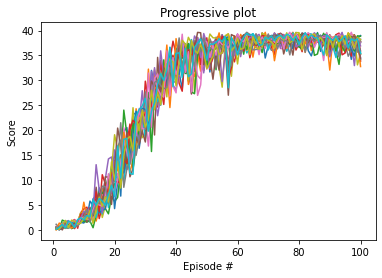

Episode 100	Average Score: 27.70
Episode 101	Last 100 Avg Score: 28.07019437258225	 Episode Avg Score: 37.70199915729463	Scores: [38.28999914 38.84999913 37.62999916 37.77999916 39.04999913 38.39999914
 38.07999915 38.06999915 35.41999921 38.74999913 35.00999922 37.83999915
 38.49999914 36.20999919 35.7199992  38.72999913 37.28999917 37.91999915
Episode 102	Last 100 Avg Score: 28.43676436438877	 Episode Avg Score: 36.982999173365535	Scores: [35.6199992  38.22999915 36.14999919 35.51999921 36.12999919 36.58999918
 37.89999915 39.01999913 37.52999916 39.55999912 38.12999915 34.32999923
 36.88999918 32.54999927 38.97999913 35.20999921 37.15999917 39.52999912
Episode 103	Last 100 Avg Score: 28.802264356219208	 Episode Avg Score: 37.40899916384369	Scores: [38.33999914 39.01999913 36.92999917 38.97999913 36.86999918 38.82999913
 36.36999919 32.81999927 34.80999922 34.87999922 38.08999915 37.23999917
 36.64999918 39.37999912 38.71999913 37.12999917 36.38999919 39.21999912
Episode 104	Last 100

In [8]:
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    score = np.zeros(num_agents)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations
        agent.reset()
        score = 0
        for t in range(max_t):
            action, actionWithoutNoise = agent.act(state)
            # next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards
            next_state = env_info.vector_observations
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)

            state = next_state
            score = score + np.array(reward)
            if np.any(done):
                break 
        scores_deque.append(score)
        scores.append(score)
        meanScore = np.mean(scores_deque)
        print('\rEpisode {}'.format(i_episode)+'\tLast 100 Avg Score: {}'.format(meanScore) +'\t Episode Avg Score: {}'.format(np.mean(score))  +'\tScores: {}'.format(score), end="")
        if i_episode % 10 == 0:
            figures(scores)
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if meanScore > 30:
            # enough training
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break   
    return scores

scores = ddpg()

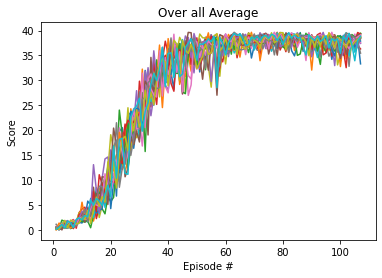

In [9]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Over all Average')
plt.show()

Total score (averaged over agents) this episode: 37.337239165447656
Scores of agents last episode: [array([39.63999911, 39.63999911, 39.26999912, 39.68999911, 38.65999914,
       39.62999911, 38.54999914, 39.58999912, 39.57999912, 39.54999912,
       39.69999911, 39.63999911, 39.42999912, 39.68999911, 39.43999912,
       38.30999914, 38.47999914, 39.61999911, 39.49999912, 38.23999915])]


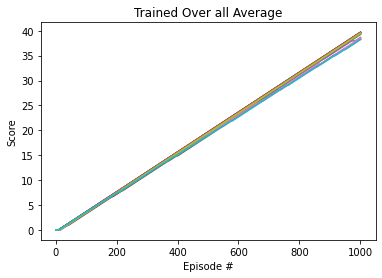

In [18]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = []
episodeScore = 0
while True:
    ignoreInTesting, actions = agent.act(states, add_noise=False) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    episodeScore =  episodeScore + np.array(rewards)
    scores.append(episodeScore)                        # update the score (for each agent)
    states = next_states                               # roll over states to next time step

    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores[-100:])))
print('Scores of agents last episode: {}'.format(scores[-1:]))
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Trained Over all Average')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```